# **Desafio: Testes de Hipóteses**

####Squad Jill Tarter



---



### Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf



---



## **Desafio 1: Cosméticos**

### Abrindo, lendo o arquivo e analisando o dataset

Clicar no link e baixar o arquivo na sua máquina:

https://drive.google.com/file/d/15Pd-ykZR_ChHHDKPghAUFAde-HS-GfQ2/view?usp=drive_link

In [ ]:
#Após rodar o código, clique em "Escolher arquivos" para importar o arquivo que você baixou
from google.colab import files
uploaded = files.upload()

Saving desafio_01_cosmeticos.csv to desafio_01_cosmeticos.csv


In [ ]:
df_cosmeticos = pd.read_csv('desafio_01_cosmeticos.csv', sep = ',')
df_cosmeticos.head()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1


In [ ]:
df_cosmeticos.shape

(300, 5)

In [ ]:
df_cosmeticos.dtypes

,0
id_produto,int64
id_voluntária,int64
durabilidade,int64
idade,int64
exposicao_sol,int64


In [ ]:
df_cosmeticos.describe()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.000000,150.500000,17.133333,36.886667,0.440000
std,0.817861,86.746758,10.942945,12.625841,0.497216
min,1.000000,1.000000,5.000000,18.000000,0.000000
25%,1.000000,75.750000,9.000000,26.000000,0.000000
50%,2.000000,150.500000,14.000000,36.000000,0.000000
75%,3.000000,225.250000,20.000000,48.000000,1.000000
max,3.000000,300.000000,48.000000,60.000000,1.000000




---



### **Instruções do desafio**

**Mateiral de Apoio:**
https://medium.com/rodrigo-lampier/usando-teste-de-hip%C3%B3teses-para-responder-quest%C3%B5es-de-neg%C3%B3cio-8a3d5ae9ebc0

Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O time de produtos dessa empresa está interessado criar novos batons com maior durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.

Com isso, a empresa fez uma pesquisa com várias voluntárias e populou a base de dados (desafio_01_cosmeticos.csv) contendo as seguintes informações:
* id_produto: código identificador do produto, com a fórmula utilizada. Para
diferenciarmos se se trata do batom com a fórmula 1, 2 ou 3;
* id_voluntária: código identificador da voluntária que utilizou o produto;
* durabilidade: quanto tempo o produto durou em horas;
* idade: idade da voluntária;
* exposicao_sol: variável que indica se a voluntária se expôs ao sol(1) e o caso contrário (0).

De posse dessas informações, o time de produtos solicitou aos analistas de dados da empresa as seguintes perguntas a serem respondidas:

### **Exercício 1**
1 - Existe diferença estatisticamente significativa na durabilidade dos batons com fórmulas diferentes?



In [ ]:
# ANOVA para comparar as durabilidades

#Aqui, usamos o modelo de regressão linear OLS (Ordinary Least Squares) da biblioteca statsmodels.
#Estamos tentando prever a durabilidade dos batons com base na variável categórica id_produto, que representa as diferentes fórmulas dos batons. O C(id_produto) indica que essa variável é categórica.

anova_results = smf.ols('durabilidade ~ C(id_produto)', data = df_cosmeticos).fit()
anova_table = sm.stats.anova_lm(anova_results, typ=2)
print(anova_table)

# Verificando o p-value
p_value = anova_table['PR(>F)'].iloc[0]  # Usando .iloc para acessar pelo índice
if p_value < 0.05:
    print('\n Há uma diferença estatisticamente significativa na durabilidade dos batons com fórmulas diferentes.')
else:
    print('\n Não há uma diferença estatisticamente significativa na durabilidade dos batons com fórmulas diferentes.')

                     sum_sq     df           F        PR(>F)
C(id_produto)  22142.206667    2.0  240.668056  7.345247e-63
Residual       13662.460000  297.0         NaN           NaN

 Há uma diferença estatisticamente significativa na durabilidade dos batons com fórmulas diferentes.


In [ ]:
"""
sum_sq: A soma dos quadrados para cada grupo e para o resíduo. A soma dos quadrados para C(id_produto) é 22142, indicando a variabilidade entre as diferentes fórmulas.
df: Os graus de liberdade associados. Para C(id_produto), temos 2, indicando que existem três grupos (fórmulas) comparados.
F: O valor de F é 240,67, que é uma medida da razão entre a variabilidade explicada pelo modelo e a variabilidade residual. Um valor alto sugere que as médias dos grupos são diferentes.
PR(>F): O p-valor associado ao teste F. No nosso caso, ele é 7,35e-63, que é extremamente pequeno.
"""

In [ ]:
# quartis da durabilidade

"""
Os quartis complementam a análise, mostrando a dispersão dos dados (quanto tempo o batom dura em horas) e as diferenças no comportamento das durabilidades.
Eles evidenciam a assimetria nos dados e/ou a presença de outliers.
"""
quartis_durabilidade = df_cosmeticos['durabilidade'].describe()[['min', '25%', '50%', '75%', 'max']]
quartis_durabilidade

,durabilidade
min,5.0
25%,9.0
50%,14.0
75%,20.0
max,48.0


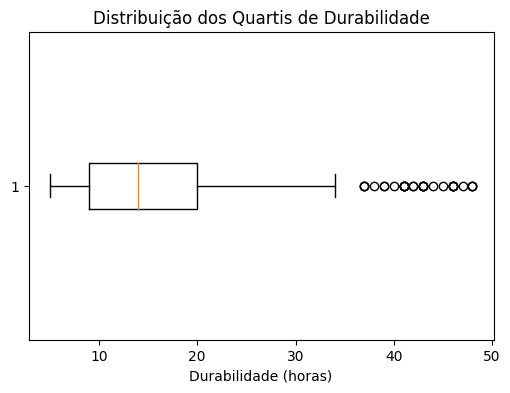

In [ ]:
#boxplot para visualizar a distribuição dos quartis
plt.figure(figsize=(6, 4))
plt.boxplot(df_cosmeticos['durabilidade'], vert=False)
plt.title('Distribuição dos Quartis de Durabilidade')
plt.xlabel('Durabilidade (horas)')
plt.show()

In [ ]:
print("Esses valores mostram uma maior variação na durabilidade, com o máximo chegando a 48 horas. \nO intervalo entre o 1º quartil (Q1) e o 3º quartil (Q3) indica que a maioria dos batons duram entre 9 e 20 horas.")

Esses valores mostram uma maior variação na durabilidade, com o máximo chegando a 48 horas. 
O intervalo entre o 1º quartil (Q1) e o 3º quartil (Q3) indica que a maioria dos batons duram entre 9 e 20 horas.




---



### **Exercício 2**
2 - Essa diferença persiste ou não quando a voluntária se expõe ao sol? E com
relação à idade?

In [ ]:
# ANOVA de dois fatores
anova_interaction = smf.ols('durabilidade ~ C(id_produto) * C(exposicao_sol) + idade', data=df_cosmeticos).fit()
anova_interaction_table = sm.stats.anova_lm(anova_interaction, typ=2)
print(anova_interaction_table)
#A interação entre C(id_produto):C(exposicao_sol) analisa se a diferença na durabilidade dos batons varia com a exposição ao sol.

# Verificando o p-value para a interação
p_value_interaction = anova_interaction_table['PR(>F)']
print(p_value_interaction)

if p_value_interaction['C(id_produto):C(exposicao_sol)'] < 0.05:
    print('\n A diferença na durabilidade persiste quando a voluntária se expõe ao sol.')
else:
    print('\n A diferença na durabilidade não persiste quando a voluntária se expõe ao sol.')

                                      sum_sq     df           F        PR(>F)
C(id_produto)                   18498.728870    2.0  335.684121  1.601480e-76
C(exposicao_sol)                 2579.116473    1.0   93.603020  2.154661e-19
C(id_produto):C(exposicao_sol)   1459.616036    2.0   26.486681  2.669049e-11
idade                             218.032883    1.0    7.912995  5.239840e-03
Residual                         8073.255808  293.0         NaN           NaN
C(id_produto)                     1.601480e-76
C(exposicao_sol)                  2.154661e-19
C(id_produto):C(exposicao_sol)    2.669049e-11
idade                             5.239840e-03
Residual                                   NaN
Name: PR(>F), dtype: float64

 A diferença na durabilidade persiste quando a voluntária se expõe ao sol.


In [ ]:
print('A idade da voluntária também afeta significativamente a durabilidade do batom, embora de forma menos impactante do que as outras variáveis.')

A idade da voluntária também afeta significativamente a durabilidade do batom, embora de forma menos impactante do que as outras variáveis.


In [ ]:
"""
C(id_produto): O p-valor é muito pequeno (1.60e-76), indicando que a fórmula do batom tem uma diferença significativa na durabilidade.
C(exposicao_sol): O p-valor (2.15e-19) também é muito pequeno, mostrando que a exposição ao sol afeta significativamente a durabilidade dos batons.
C(id_produto):C(exposicao_sol): A interação tem um p-valor de 2.67e-11, o que significa que a diferença na durabilidade dos batons persiste quando a voluntária se expõe ao sol. Ou seja, a exposição ao sol influencia a durabilidade de maneira diferente dependendo da fórmula do batom.
idade: O p-valor para idade é 5.24e-03, indicando que a idade também tem um efeito significativo na durabilidade dos batons, mas em um nível menor em comparação com os outros fatores.
"""



---



### **Exercício 3**
3- Qual fórmula de batom você indicaria para consumidores que buscam maior
durabilidade e exposição ao sol?

   id_produto  exposicao_sol  durabilidade
0           1              0     17.727273
1           1              1     11.911111
2           2              0      7.961538
3           2              1      7.562500
4           3              0     33.901639
5           3              1     20.102564


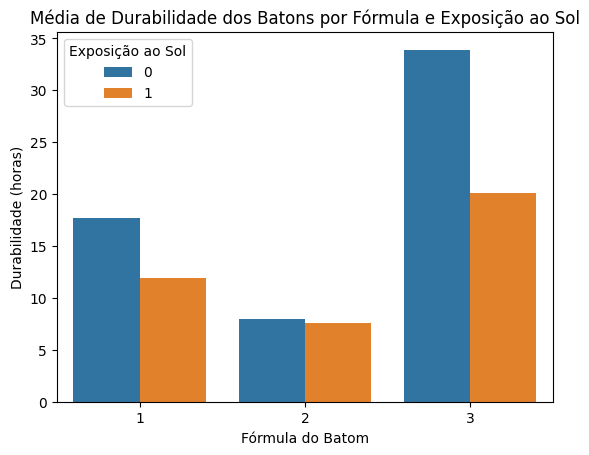


 A fórmula recomendada para maior durabilidade, considerando exposição ao sol, é a 3.0 com uma média de 33.90 horas.


In [ ]:
# Médias de durabilidade por fórmula e exposição ao sol
mean_durability = df_cosmeticos.groupby(['id_produto', 'exposicao_sol'])['durabilidade'].mean().reset_index()
print(mean_durability)

# Visualizando as médias
sns.barplot(x='id_produto', y='durabilidade', hue='exposicao_sol', data=mean_durability)
plt.title('Média de Durabilidade dos Batons por Fórmula e Exposição ao Sol')
plt.ylabel('Durabilidade (horas)')
plt.xlabel('Fórmula do Batom')
plt.legend(title='Exposição ao Sol', loc='upper left')
plt.show()

# Indicando a melhor fórmula com base nas médias
best_formula = mean_durability.loc[mean_durability['durabilidade'].idxmax()]
print(f"\n A fórmula recomendada para maior durabilidade, considerando exposição ao sol, é a {best_formula['id_produto']} com uma média de {best_formula['durabilidade']:.2f} horas.")


In [ ]:
"""
A fórmula recomendada para consumidores que buscam maior durabilidade, mesmo quando expostos ao sol, é a Fórmula 3. Ela se destaca com uma média de 33,90 horas sem exposição ao sol e 20,10 horas com exposição ao sol,
sendo a mais resistente entre as opções avaliadas.
"""




---
---
---







## **Desafio 2: Setor Alimentício**

### **Instruções do desafio**

Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de determinado produto, um novo picolé, tem uma distribuição normal com média igual a 7,85 reais e desvio padrão igual a 3,32 reais. Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro.
Para verificar se esse efeito é estatisticamente significativo, contactaram você, analista de dados.

Suponha que para realizar essa análise você tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de R$11,52.




---



## **Exercício 1**
1. Você pode concluir que existe diferença de preços estatisticamente
relevante com 5% de significância?

In [ ]:
# Dados
media_amostra = 11.52
media_populacional = 7.85
desvio_padrao = 3.32
tamanho_amostra = 45

# Calcular a estatística t
t = (media_amostra - media_populacional) / (desvio_padrao / np.sqrt(tamanho_amostra))

# Graus de liberdade
graus_liberdade = tamanho_amostra - 1

# Valor crítico para um teste bilateral
alpha = 0.05
valor_critico = stats.t.ppf(1 - alpha/2, graus_liberdade)

# Imprimir resultados
print(f'Estatística t: {t:.4f}')
print(f'Valor crítico: ±{valor_critico:.4f}\n')

# Verificação da hipótese
if abs(t) > valor_critico:
    print('Rejeitamos a hipótese nula. Existe uma diferença significativa nos preços.')
else:
    print('Não rejeitamos a hipótese nula. Não há diferença significativa nos preços.')


Estatística t: 7.4154
Valor crítico: ±2.0154

Rejeitamos a hipótese nula. Existe uma diferença significativa nos preços.




---



## **Exercício 2**
2. Qual é o valor da variável teste, o intervalo de confiança e o p-valor?

In [ ]:
# Dados
media_amostra = 11.52
media_populacional = 7.85
desvio_padrao = 3.32
tamanho_amostra = 45

# Calcular a estatística t
t = (media_amostra - media_populacional) / (desvio_padrao / np.sqrt(tamanho_amostra))

# Graus de liberdade
graus_liberdade = tamanho_amostra - 1

# Valor crítico para um teste bilateral
alpha = 0.05
valor_critico = stats.t.ppf(1 - alpha/2, graus_liberdade)

# Calcular o intervalo de confiança
margem_erro = valor_critico * (desvio_padrao / np.sqrt(tamanho_amostra))
ic_inferior = media_amostra - margem_erro
ic_superior = media_amostra + margem_erro

# Calcular o p-valor
p_valor = 2 * (1 - stats.t.cdf(abs(t), graus_liberdade))

# Imprimir resultados
print(f'Estatística t: {t:.4f}')
print(f'Valor crítico: ±{valor_critico:.4f}')
print(f'Intervalo de Confiança (95%): ({ic_inferior:.2f}, {ic_superior:.2f})')
print(f'P-valor: {p_valor:.4f}\n')

# Verificação da hipótese
if abs(t) > valor_critico:
    print('Rejeitamos a hipótese nula. Existe uma diferença significativa nos preços.')
else:
    print('Não rejeitamos a hipótese nula. Não há diferença significativa nos preços.')


Estatística t: 7.4154
Valor crítico: ±2.0154
Intervalo de Confiança (95%): (10.52, 12.52)
P-valor: 0.0000

Rejeitamos a hipótese nula. Existe uma diferença significativa nos preços.
